In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/dataset.csv


In [ ]:
import pandas as pd
from termcolor import colored
from sklearn.model_selection import train_test_split

# Define variables
COLUMNS = ['Sentiment', 'Id', 'Date', 'Flag', 'User', 'Tweet']

# Read dataset
dataset = pd.read_csv('/kaggle/input/dataset/dataset.csv', names = COLUMNS, encoding = 'latin-1')
print(colored("Columns: {}".format(', '.join(COLUMNS)), "yellow"))

# Remove extra columns
print(colored("Useful columns: Sentiment and Tweet", "yellow"))
print(colored("Removing other columns", "red"))
dataset.drop(['Id', 'Date', 'Flag', 'User'], axis = 1, inplace = True)
print(colored("Columns removed", "red"))

# Train test split
print(colored("Splitting train and test dataset into 80:20", "yellow"))
X_train, X_test, y_train, y_test = train_test_split(dataset['Tweet'], dataset['Sentiment'], test_size = 0.20, random_state = 100)
train_dataset = pd.DataFrame({
	'Tweet': X_train,
	'Sentiment': y_train
	})
print(colored("Train data distribution:", "yellow"))
print(train_dataset['Sentiment'].value_counts())
test_dataset = pd.DataFrame({
	'Tweet': X_test,
	'Sentiment': y_test
	})
print(colored("Test data distribution:", "yellow"))
print(test_dataset['Sentiment'].value_counts())
print(colored("Split complete", "yellow"))

# Save train data
print(colored("Saving train data", "yellow"))

train_dataset.to_csv('train.csv', index = False)
print(colored("Train data saved to train.csv", "green"))

# Save test data
print(colored("Saving test data", "yellow"))
test_dataset.to_csv('test.csv', index = False)
print(colored("Test data saved to test.csv", "green"))

Columns: Sentiment, Id, Date, Flag, User, Tweet
Useful columns: Sentiment and Tweet
Removing other columns
Columns removed
Splitting train and test dataset into 80:20
Train data distribution:
Sentiment
4    640434
0    639566
Name: count, dtype: int64
Test data distribution:
Sentiment
0    160434
4    159566
Name: count, dtype: int64
Split complete
Saving train data
Train data saved to train.csv
Saving test data
Test data saved to test.csv


In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from termcolor import colored
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Import datasets
print("Loading data")
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Setting stopwords
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.remove("not")

# Function to expand tweet
def expand_tweet(tweet):
	expanded_tweet = []
	for word in tweet:
		if re.search("n't", word):
			expanded_tweet.append(word.split("n't")[0])
			expanded_tweet.append("not")
		else:
			expanded_tweet.append(word)
	return expanded_tweet

# Function to process tweets
def clean_tweet(data, wordNetLemmatizer, porterStemmer):
	data['Clean_tweet'] = data['Tweet']
	print(colored("Removing user handles starting with @", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].str.replace("@[\w]*","")
	print(colored("Removing numbers and special characters", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].str.replace("[^a-zA-Z' ]","")
	print(colored("Removing urls", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].replace(re.compile(r"((www\.[^\s]+)|(https?://[^\s]+))"), "")
	print(colored("Removing single characters", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].replace(re.compile(r"(^| ).( |$)"), " ")
	print(colored("Tokenizing", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].str.split()
	print(colored("Removing stopwords", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [word for word in tweet if word not in STOPWORDS])
	print(colored("Expanding not words", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: expand_tweet(tweet))
	print(colored("Lemmatizing the words", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [wordNetLemmatizer.lemmatize(word) for word in tweet])
	print(colored("Stemming the words", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: [porterStemmer.stem(word) for word in tweet])
	print(colored("Combining words back to tweets", "yellow"))
	data['Clean_tweet'] = data['Clean_tweet'].apply(lambda tweet: ' '.join(tweet))
	return data

# Define processing methods
wordNetLemmatizer = WordNetLemmatizer()
porterStemmer = PorterStemmer()

# Pre-processing the tweets
print(colored("Processing train data", "green"))
train_data = clean_tweet(train_data, wordNetLemmatizer, porterStemmer)
train_data.to_csv('clean_train.csv', index = False)
print(colored("Train data processed and saved to clean_train.csv", "green"))
print(colored("Processing test data", "green"))
test_data = clean_tweet(test_data, wordNetLemmatizer, porterStemmer)
test_data.to_csv('clean_test.csv', index = False)
print(colored("Test data processed and saved to clean_test.csv", "green"))

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading data
Processing train data
Removing user handles starting with @
Removing numbers and special characters
Removing urls
Removing single characters
Tokenizing
Removing stopwords
Expanding not words
Lemmatizing the words
Stemming the words
Combining words back to tweets
Train data processed and saved to clean_train.csv
Processing test data
Removing user handles starting with @
Removing numbers and special characters
Removing urls
Removing single characters
Tokenizing
Removing stopwords
Expanding not words
Lemmatizing the words
Stemming the words
Combining words back to tweets
Test data processed and saved to clean_test.csv


In [ ]:
import os
import tensorflow as tf
import pandas as pd
from termcolor import colored
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Input,
    Embedding,
    SpatialDropout1D,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Bidirectional,
    LSTM,
    GlobalMaxPooling1D,
    Dense,
    Dropout
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

2025-05-19 07:35:53.412503: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747640153.645319      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747640153.707087      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# --- 1) VERİ YÜKLE & ÖN İŞLEME ---
print(colored("Loading and preparing data", "yellow"))
full_train = pd.read_csv('clean_train.csv')
full_test  = pd.read_csv('clean_test.csv')

# %80 alt örnek (sınıf dengeli)
train_data = (
    full_train
    .groupby('Sentiment', group_keys=False)
    .sample(frac=0.20, random_state=123)
    .reset_index(drop=True)
)

# karıştır ve temizle
train_data = train_data.sample(frac=1.0, random_state=42).reset_index(drop=True)
train_data['Clean_tweet'] = train_data['Clean_tweet'].fillna('').astype(str)

Loading and preparing data


In [ ]:
# --- 2) TOKENİZASYON ---
print(colored("Tokenizing and padding", "yellow"))
vocab_size    = 10000
embedding_dim = 128

tokenizer = Tokenizer(num_words=vocab_size, split=' ')
tokenizer.fit_on_texts(train_data['Clean_tweet'])

seqs    = tokenizer.texts_to_sequences(train_data['Clean_tweet'])
max_len = max(len(s) for s in seqs)

X = pad_sequences(seqs, maxlen=max_len)
y = pd.get_dummies(train_data['Sentiment']).values
num_classes = y.shape[1]


Tokenizing and padding


In [ ]:
# --- 3) TRAIN/VAL SPLIT (stratify) ---
print(colored("Creating stratified train/validation split", "yellow"))
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4) CALLBACKS ---
early_stop = EarlyStopping(
    monitor='val_loss', patience=3,
    restore_best_weights=True, verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5,
    patience=2, min_lr=1e-6, verbose=1
)

Creating stratified train/validation split


CNN katmanları ile yerel n-gram özellikleri çıkarıp, BiLSTM katmanlarıyla uzun dönemli bağımlılıklar yakalanır. BatchNormalization, Dropout overfitting’i kontrol altında tutar. Son olarak, dense katman ve softmax çıkış ile çok sınıflı sınıflandırma gerçekleştirilir.


Verinin %20'si kullanılmıştır

- **Input**   
- **Embedding**  
- **Conv1D**  
- **BatchNormalization**  
- **Dropout**  
- **Bidirectional LSTM**   
- **Dropout**  
- **Dense** (ReLU)  
- **Dropout**  
- **Dense** (num_classes, Softmax)  


In [ ]:
# --- 5) CNN + BiLSTM MODEL ---
print(colored("Building the tuned CNN+BiLSTM model", "yellow"))
model = Sequential([
    Input(shape=(max_len,)),

    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        embeddings_regularizer=l2(1e-4)
    ),
    SpatialDropout1D(0.2),

    # n-gram çıkarımı
    Conv1D(
        filters=128,
        kernel_size=5,
        activation='relu',
        padding='same',
        kernel_regularizer=l2(1e-4)
    ),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    # Zaman bağımlılığı
    Bidirectional(
        LSTM(
            128,
            return_sequences=True,
            dropout=0.3,
            recurrent_dropout=0.3,
            kernel_regularizer=l2(1e-4),
            recurrent_regularizer=l2(1e-4)
        )
    ),
    GlobalMaxPooling1D(),
    Dropout(0.3),

    # Tam bağlantı + softmax
    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)
model.summary()


Building the tuned CNN+BiLSTM model


2025-05-19 07:36:23.237678: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 36, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 36, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 36, 128)             │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 36, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 18, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 18, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 18, 256)             │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 256)                 │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,658,882 (6.33 MB)

 Trainable params: 1,658,626 (6.33 MB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
# --- 6) MODELİ EĞİTİMİ ---
print(colored("Training with tuned hyperparameters", "green"))
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)
print(colored("Training complete", "green"))

Training with tuned hyperparameters
Epoch 1/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 267s 80ms/step - accuracy: 0.7179 - loss: 0.6474 - val_accuracy: 0.7720 - val_loss: 0.5570 - learning_rate: 0.0010
Epoch 2/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 254s 79ms/step - accuracy: 0.7797 - loss: 0.5545 - val_accuracy: 0.7778 - val_loss: 0.5521 - learning_rate: 0.0010
Epoch 3/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 252s 79ms/step - accuracy: 0.7849 - loss: 0.5466 - val_accuracy: 0.7788 - val_loss: 0.5489 - learning_rate: 0.0010
Epoch 4/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 252s 79ms/step - accuracy: 0.7882 - loss: 0.5411 - val_accuracy: 0.7808 - val_loss: 0.5485 - learning_rate: 0.0010
Epoch 5/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 253s 79ms/step - accuracy: 0.7905 - loss: 0.5385 - val_accuracy: 0.7812 - val_loss: 0.5461 - learning_rate: 0.0010
Epoch 6/20
3200/3200 ━━━━━━━━━━━━━━━━━━━━ 255s 80ms/step - accuracy: 0.7927 - loss: 0.5375 - val_accuracy: 0.7796 - val_loss: 0.5531 - learning_rate: 0.0010
Epoch 7/20
3200/3200 ━

In [ ]:
# --- Test Verisini Hazırlama ---
print(colored("Preparing test data", "yellow"))

# 1. Eksik değerleri boş string ile doldur ve string’e çevir
test_data['Clean_tweet'] = test_data['Clean_tweet'].fillna('').astype(str)

# 2. Tokenizer ile dizilere dönüştür
test_seq = tokenizer.texts_to_sequences(test_data['Clean_tweet'].values)

# 3. Eğitimde kullandığımız max_len ile pad et
X_test = pad_sequences(test_seq, maxlen=max_len)

# 4. Etiketleri one-hot encode et
y_test = pd.get_dummies(test_data['Sentiment']).values

# --- Modeli Test Etme ---
print(colored("Testing the LSTM model", "green"))
score, accuracy = model.evaluate(
    X_test, y_test,
    batch_size=128,
    verbose=1
)
print(f"Test loss: {score:.4f}, Test accuracy: {accuracy:.4f}")

Preparing test data
Testing the LSTM model
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 86s 34ms/step - accuracy: 0.7864 - loss: 0.5212
Test loss: 0.5218, Test accuracy: 0.7854


In [ ]:
# Modeli kaydet
model.save('lstm_model.h5')
print(colored("Model saved to lstm_model.h5", "green"))

# History nesnesini kaydet
import pickle

with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)
print(colored("Training history saved to training_history.pkl", "green"))

Model saved to lstm_model.h5
Training history saved to training_history.pkl


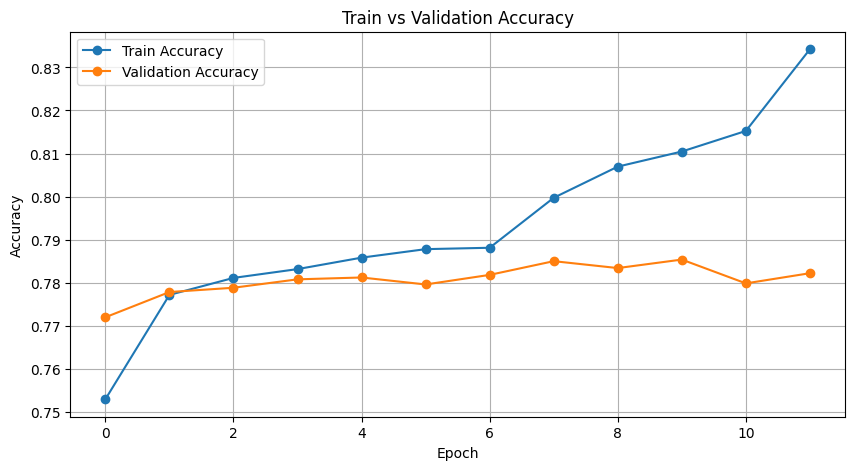

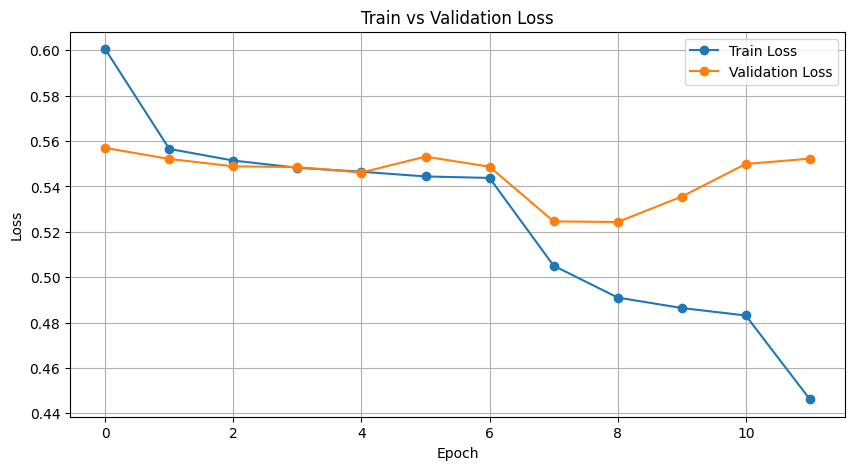

In [ ]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama accuracy grafiği
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('accuracy_plot.png')
plt.show()

# Eğitim ve doğrulama loss grafiği
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_plot.png')
plt.show()